# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import math
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='

citySets = np.array_split(cities, math.ceil(len(cities)/40))
cityData = []
sCount = 0
errCount = 0

print('Beginning Data Retrieval\n-----------------------------')

for citySet in citySets:
    rCount = 0
    sCount = sCount + 1
    
    for city in citySet:
        rCount = rCount + 1
        try:
            print(f'Processing Reccord {rCount} of Set {sCount} | {city}')
            response = requests.get(f'{url}{city}&appid={weather_api_key}')
            response.raise_for_status()
            
        except requests.HTTPError as exception:
            errCount = errCount + 1
            print(f'City, {city}, NOT found. Skipping...')
            continue
        
        cityData.append(response.json())

print(f'-----------------------------\nData Retrieval Complete.\nFound {len(cityData)} 
      Records from {len(cities)} cities.\n{errCount} cities not found')

SyntaxError: EOL while scanning string literal (<ipython-input-40-e4e722301c91>, line 28)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
cityData_df = pd.DataFrame(columns = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 
                                      'Country', 'Date'])
dfCount = 0
for data in cityData:
    dfCount = dfCount + 1
    curCityInfo = {
        "City" : data['name'],
        "Lat" : data['coord']['lat'],
        "Lng" : data['coord']['lon'],
        "Max Temp" : round(data['main']['temp_max'], 2),
        "Humidity" : data['main']['humidity'],
        "Cloudiness" : data['clouds']['all'],
        "Wind Speed" : data['wind']['speed'],
        "Country" : data['sys']['country'],
        "Date" : data['dt']
    }
    
    cityData_df = cityData_df.append(curCityInfo, ignore_index = True)
cityData_df = cityData_df.rename_axis('City_ID')
cityData_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Upernavik,72.7868,-56.1549,263.85,60,13,2.60,GL,1635203150
1,Kavieng,-2.5744,150.7967,301.84,69,98,1.62,PG,1635203150
2,Halifax,44.6453,-63.5724,282.09,81,100,2.24,CA,1635203038
3,Bredasdorp,-34.5322,20.0403,287.55,90,34,4.92,ZA,1635203151
4,Mar del Plata,-38.0023,-57.5575,288.16,62,0,1.79,AR,1635203151


In [42]:
cityData_csv = cityData_df.to_csv(output_data_file, index_label = 'City_ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
cityData_df.loc[cityData_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


In [44]:
#  Get the indices of cities that have humidity over 100%.


In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

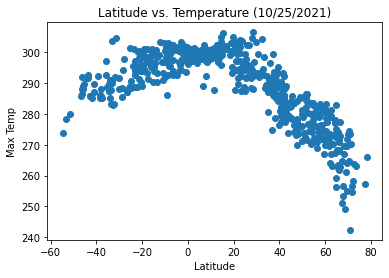

In [46]:
plt.figure(1)
plt.scatter(cityData_df['Lat'], cityData_df['Max Temp'])
plt.title(f'Latitude vs. Temperature ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('../output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

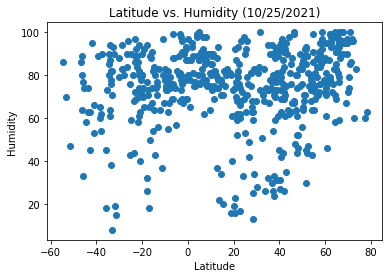

In [47]:
plt.figure(2)
plt.scatter(cityData_df['Lat'], cityData_df['Humidity'])
plt.title(f'Latitude vs. Humidity ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

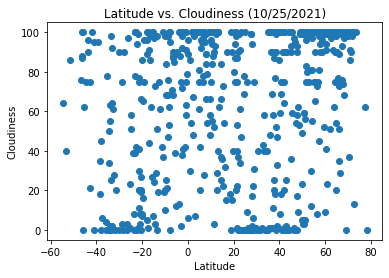

In [48]:
plt.figure(3)
plt.scatter(cityData_df['Lat'], cityData_df['Cloudiness'])
plt.title(f'Latitude vs. Cloudiness ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('../output_data/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

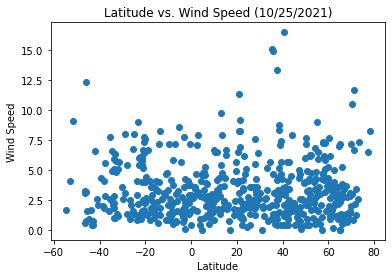

In [49]:
plt.figure(4)
plt.scatter(cityData_df['Lat'], cityData_df['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('../output_data/Fig4.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7897537225058073


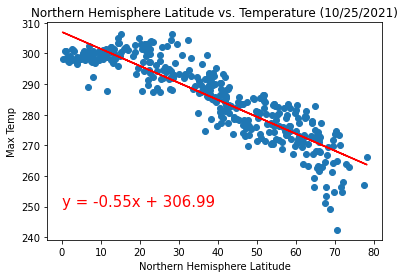

In [50]:
f1x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f1y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Max Temp']
(f1slope, f1intercept, f1rvalue, f1pvalue, f1stderr) = linregress(f1x_values, f1y_values)
f1regress_values = f1x_values * f1slope + f1intercept
f1line_eq = "y = " + str(round(f1slope,2)) + "x + " + str(round(f1intercept,2))
plt.scatter(f1x_values,f1y_values)
plt.plot(f1x_values,f1regress_values,"r-")
plt.annotate(f1line_eq,(0,250),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Temperature ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {f1rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5065697298933626


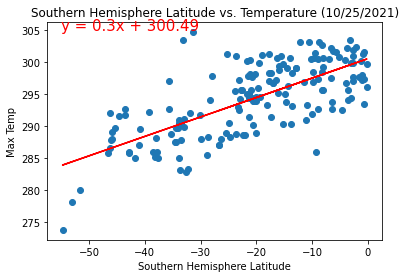

In [51]:
f1ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f1ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Max Temp']
(f1aslope, f1aintercept, f1arvalue, f1apvalue, f1astderr) = linregress(f1ax_values, f1ay_values)
f1aregress_values = f1ax_values * f1aslope + f1aintercept
f1aline_eq = "y = " + str(round(f1aslope,2)) + "x + " + str(round(f1aintercept,2))
plt.scatter(f1ax_values,f1ay_values)
plt.plot(f1ax_values,f1aregress_values,"r-")
plt.annotate(f1aline_eq,(-55,305),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Temperature ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {f1arvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020506938505977144


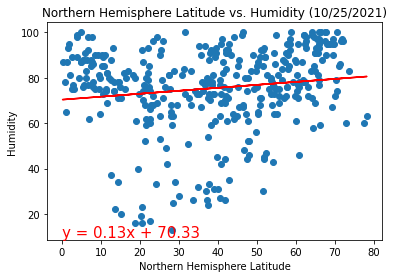

In [52]:
f2x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f2y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Humidity'].astype('float64')
(f2slope, f2intercept, f2rvalue, f2pvalue, f2stderr) = linregress(f2x_values, f2y_values)
f2regress_values = f2x_values * f2slope + f2intercept
f2line_eq = "y = " + str(round(f2slope,2)) + "x + " + str(round(f2intercept,2))
plt.scatter(f2x_values,f2y_values)
plt.plot(f2x_values,f2regress_values,"r-")
plt.annotate(f2line_eq,(0,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Humidity ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {f2rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04068768605202056


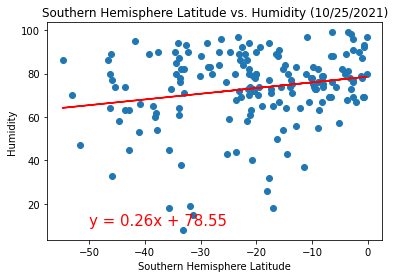

In [53]:
f2ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f2ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Humidity'].astype('float64')
(f2aslope, f2aintercept, f2arvalue, f2apvalue, f2astderr) = linregress(f2ax_values, f2ay_values)
f2aregress_values = f2ax_values * f2aslope + f2aintercept
f2aline_eq = "y = " + str(round(f2aslope,2)) + "x + " + str(round(f2aintercept,2))
plt.scatter(f2ax_values,f2ay_values)
plt.plot(f2ax_values,f2aregress_values,"r-")
plt.annotate(f2aline_eq,(-50,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Humidity ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {f2arvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.025067317960382293


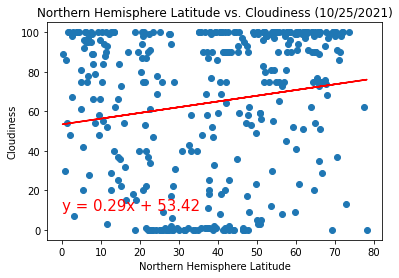

In [54]:
f3x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f3y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Cloudiness'].astype('float64')
(f3slope, f3intercept, f3rvalue, f3pvalue, f3stderr) = linregress(f3x_values, f3y_values)
f3regress_values = f3x_values * f3slope + f3intercept
f3line_eq = "y = " + str(round(f3slope,2)) + "x + " + str(round(f3intercept,2))
plt.scatter(f3x_values,f3y_values)
plt.plot(f3x_values,f3regress_values,"r-")
plt.annotate(f3line_eq,(0,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {f3rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02735851983229311


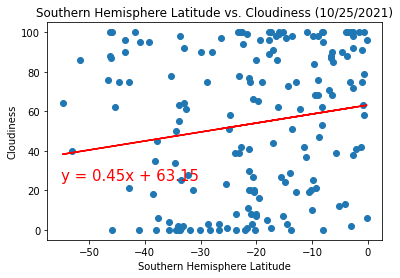

In [55]:
f3ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f3ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Cloudiness'].astype('float64')
(f3aslope, f3aintercept, f3arvalue, f3apvalue, f3astderr) = linregress(f3ax_values, f3ay_values)
f3aregress_values = f3ax_values * f3aslope + f3aintercept
f3aline_eq = "y = " + str(round(f3aslope,2)) + "x + " + str(round(f3aintercept,2))
plt.scatter(f3ax_values,f3ay_values)
plt.plot(f3ax_values,f3aregress_values,"r-")
plt.annotate(f3aline_eq,(-55,25),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {f3arvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00030503760983108556


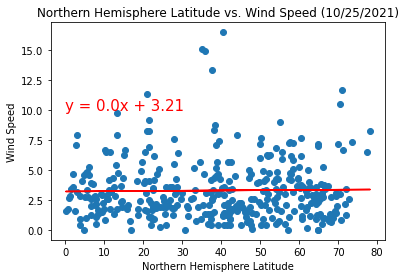

In [56]:
f4x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f4y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Wind Speed']
(f4slope, f4intercept, f4rvalue, f4pvalue, f4stderr) = linregress(f4x_values, f4y_values)
f4regress_values = f4x_values * f4slope + f4intercept
f4line_eq = "y = " + str(round(f4slope,2)) + "x + " + str(round(f4intercept,2))
plt.scatter(f4x_values,f4y_values)
plt.plot(f4x_values,f4regress_values,"r-")
plt.annotate(f4line_eq,(0,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {f4rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009948204576045729


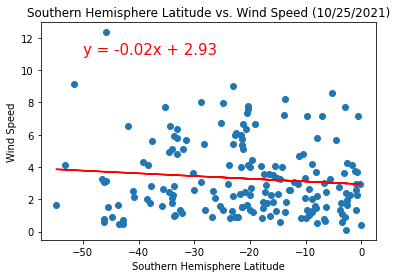

In [57]:
f4ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f4ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Wind Speed']
(f4aslope, f4aintercept, f4arvalue, f4apvalue, f4astderr) = linregress(f4ax_values, f4ay_values)
f4aregress_values = f4ax_values * f4aslope + f4aintercept
f4aline_eq = "y = " + str(round(f4aslope,2)) + "x + " + str(round(f4aintercept,2))
plt.scatter(f4ax_values,f4ay_values)
plt.plot(f4ax_values,f4aregress_values,"r-")
plt.annotate(f4aline_eq,(-50,11),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {f4arvalue**2}")
plt.show()